![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

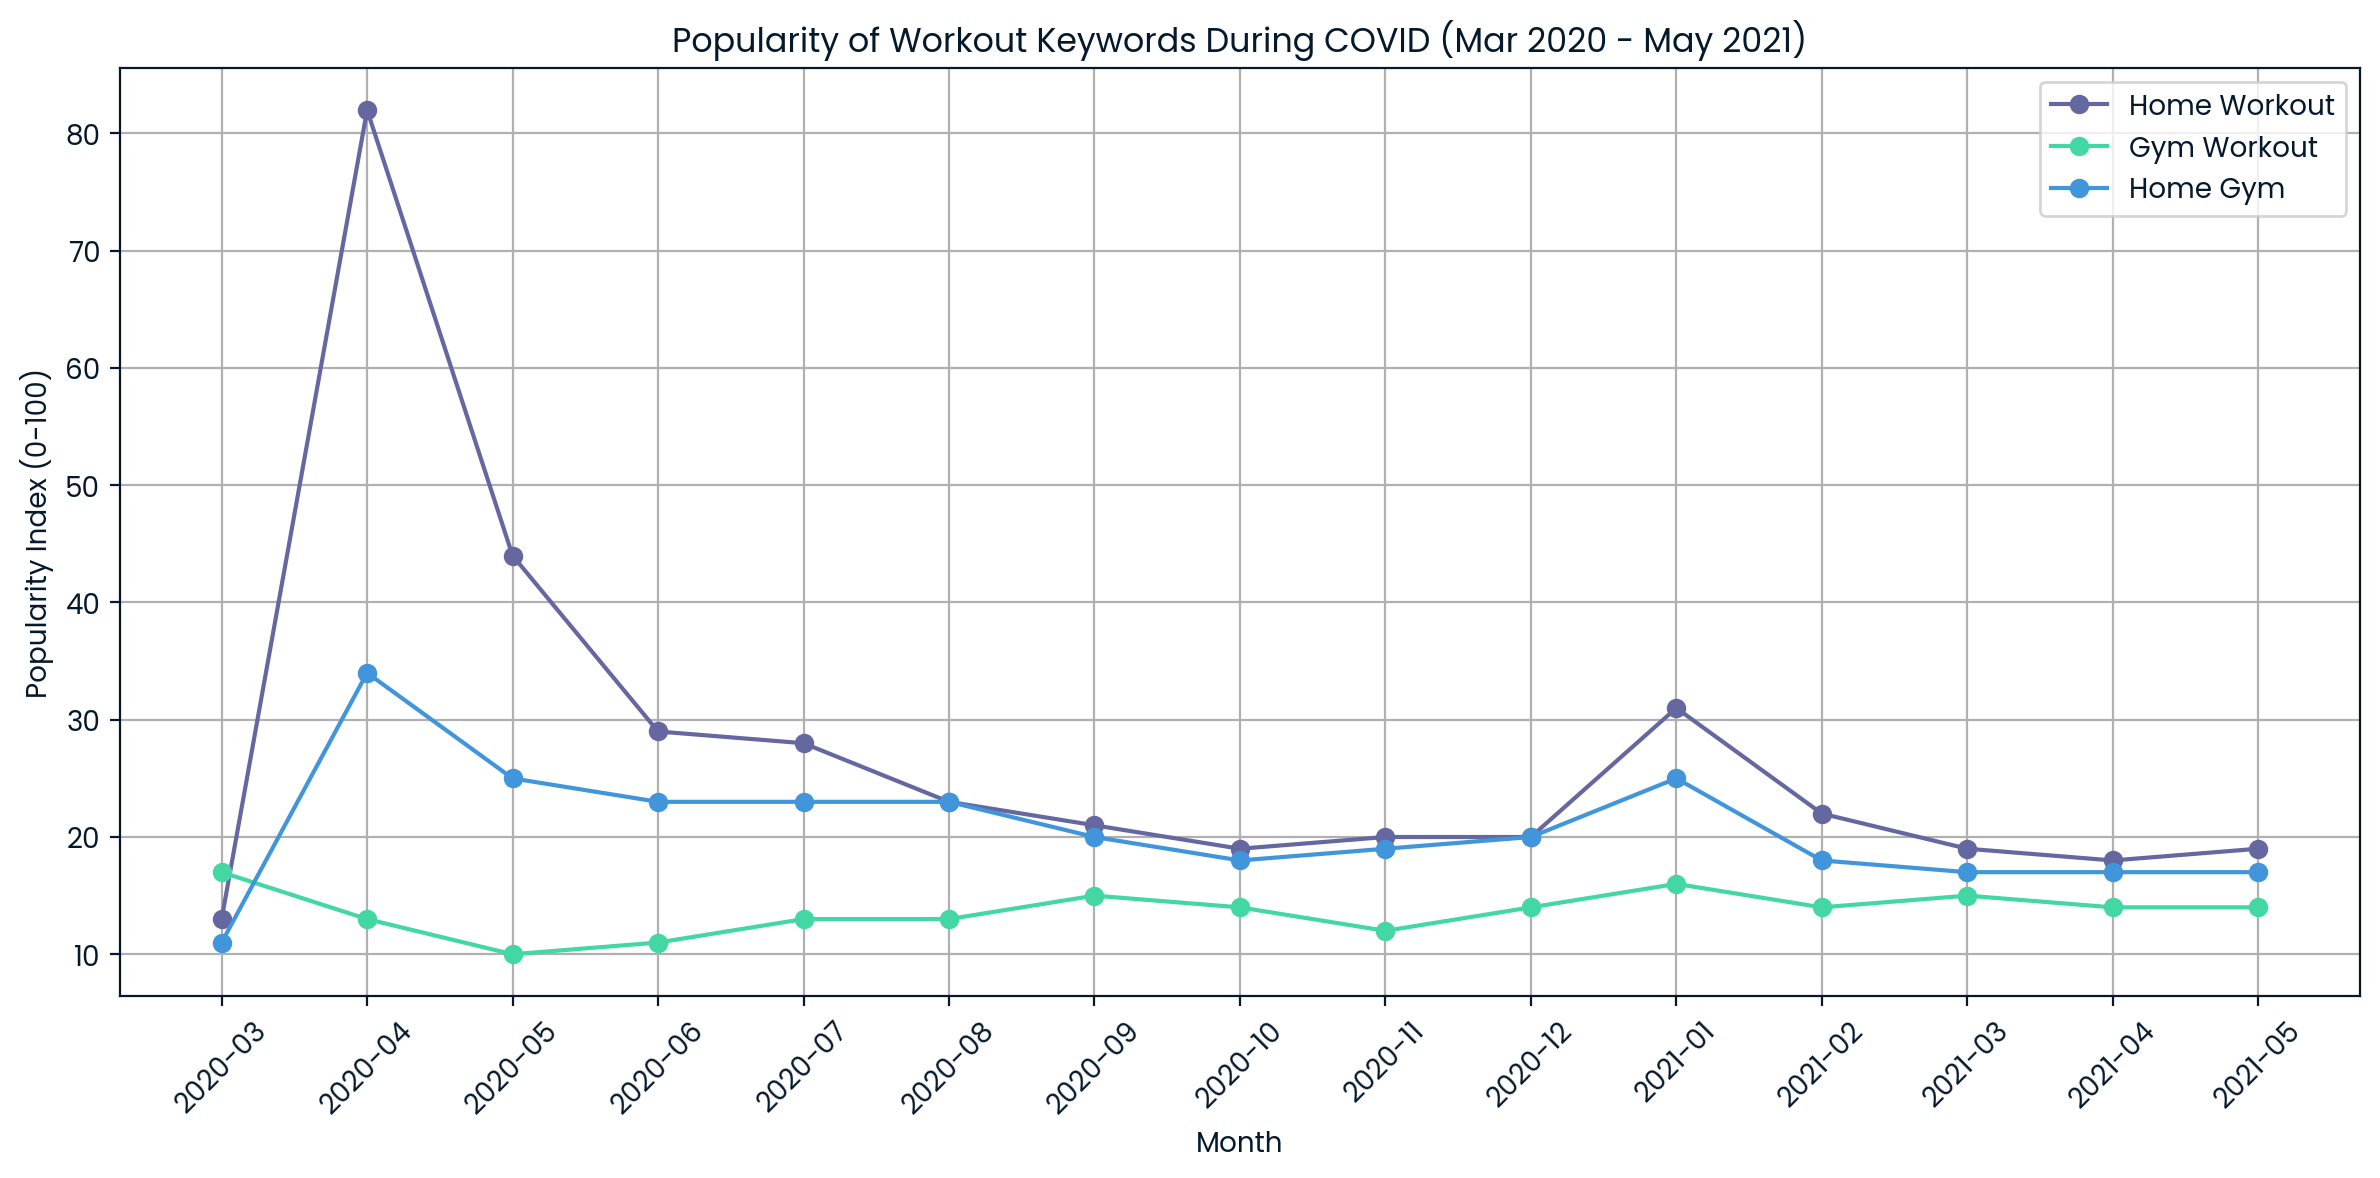

Year of peak interest: 2020
Most popular during COVID: home workout
Most popular now: gym workout
Country with highest interest: United States
Country with highest interest in home workouts: Philippines


In [15]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
workout_df = pd.read_csv('data/workout.csv')
three_keywords_df = pd.read_csv('data/three_keywords.csv')
workout_geo_df = pd.read_csv('data/workout_geo.csv')
three_keywords_geo_df = pd.read_csv('data/three_keywords_geo.csv')

# 1. Find the peak interest year for the 'workout' keyword globally
peak_workout_row = workout_df.loc[workout_df['workout_worldwide'].idxmax()]
year_str = peak_workout_row['month'][:4]  # Assuming the month format is 'yyyy-mm'

# 2. Define COVID period and visualize the data
covid_period = three_keywords_df[(three_keywords_df['month'] >= '2020-03') & (three_keywords_df['month'] <= '2021-05')]

# Plotting the trends for visualization
plt.figure(figsize=(12, 6))
plt.plot(covid_period['month'], covid_period['home_workout_worldwide'], label='Home Workout', marker='o')
plt.plot(covid_period['month'], covid_period['gym_workout_worldwide'], label='Gym Workout', marker='o')
plt.plot(covid_period['month'], covid_period['home_gym_worldwide'], label='Home Gym', marker='o')
plt.title('Popularity of Workout Keywords During COVID (Mar 2020 - May 2021)')
plt.xlabel('Month')
plt.ylabel('Popularity Index (0-100)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 3. Identify the most popular keyword during COVID
max_home_workout = covid_period['home_workout_worldwide'].max()
max_gym_workout = covid_period['gym_workout_worldwide'].max()
max_home_gym = covid_period['home_gym_worldwide'].max()

# Create a dictionary to map the keywords to their max values
peak_covid_dict = {
    'home workout': max_home_workout,
    'gym workout': max_gym_workout,
    'home gym': max_home_gym
}

# Find the keyword with the highest max value
peak_covid = max(peak_covid_dict, key=peak_covid_dict.get)

# 4. Find the current most popular keyword
latest_month = three_keywords_df['month'].max()
latest_data = three_keywords_df[three_keywords_df['month'] == latest_month]

# Get the values for the keywords
keyword_values = latest_data[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].values.flatten()

# Find the index of the maximum value
current_index = keyword_values.argmax()

# Mapping the index to the corresponding keyword
current_keyword = ['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide'][current_index]

# Map to human-readable format
keywords_map = {
    'home_workout_worldwide': 'home workout',
    'gym_workout_worldwide': 'gym workout',
    'home_gym_worldwide': 'home gym'
}
current = keywords_map[current_keyword]

# 5. Find the country with the highest interest in workouts
top_country_row = workout_geo_df.loc[workout_geo_df['workout_2018_2023'].idxmax()]
top_country = top_country_row['country']

# 6. Determine which country has higher interest in home workouts between the Philippines and Malaysia
home_workout_row = three_keywords_geo_df[three_keywords_geo_df['Country'].isin(['Philippines', 'Malaysia'])]
home_workout_geo_row = home_workout_row.loc[home_workout_row['home_workout_2018_2023'].idxmax()]
home_workout_geo = home_workout_geo_row['Country']

# Output results
print(f"Year of peak interest: {year_str}")
print(f"Most popular during COVID: {peak_covid}")
print(f"Most popular now: {current}")
print(f"Country with highest interest: {top_country}")
print(f"Country with highest interest in home workouts: {home_workout_geo}")
